<a href="https://colab.research.google.com/github/Kristina140699/AI-project-work/blob/main/Artificial_Intelligence_in_Manufacturing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Artificial Intelligence in Manufacturing** - **Defect Detection in PCB Manufacturing**


## **About the Project**
This project is a Defect detection module created using Machine Learning with the help of image recognition. Here we'll be using Yolov5 to detect defects in Printed Circuit Boards. 

### **Tools and Technology used:**

* Google Colab
* Kaggle
* Python
* Yolov5

### **Project Summary:**

* **Description:** PCB which stands for Printed Circuit Board is one of the most crucial components in electronic devices. It is an electronic board made of copper conductors to construct electrical connections between components. It provides mechanical support to the connection of electronic components by the means of conductive tracks, pads, and soldering. An important example of PCB is the Computer Motherboard.

  A Defective PCB  is a PCB having incorrect electrical connections among the components. Defects in PCB can have major consequences as these defects can cause a malfunction in electronic devices. It can also lead to the degradation in performance of the connected electronic components, which have a crucial impact on the performance of the entire system.
  So our main goal in the project will be to figure out the types of PCB defects using image processing with machine learning.

* **Dataset:** https://www.kaggle.com/datasets/akhatova/pcb-defects
* **Outcomes:**  Defect detection in the PCBs using a heat map.

* **Conclusion:** This is one of the most interesting project ideas that I have come across. Here I shall be using the YOLOv5 module to create the prediction model. Based on the dataset I’ll create the heat map to show the defect detection via the trained model.
 
  Since the last decade, the telecommunication and the electronic industry has witnessed a major rise in technological advancements and rapid market growth which has, in turn, led to the creation of more diverse and complex PCB designs making it, even more, to detect the defects in these boards. However, with the use of Artificial Intelligence in Manufacturing we are able to detect and rectify these errors, thus enabling the telecommunication and the electronic industry to reach new heights of success. 

# **About Dataset**
###**Context**
The Open Lab on Human Robot Interaction of Peking University has released the PCB defect dataset. The 6 types of defects are made by photoshop, a graphics editor published by Adobe Systems. The defects defined in the dataset are: ***missing hole, mouse bite, open circuit, short, spur, and spurious copper.***

###**Content**
This is a public synthetic PCB dataset containing 1386 images with 6 kinds of defetcs (missing hole, mouse bite, open circuit, short, spur, spurious copper) for the use of detection, classification and registration tasks.

###**Acknowledgements**
PCB dataset was downloaded using public link from https://github.com/Ixiaohuihuihui/Tiny-Defect-Detection-for-PCB

###**Authors of dataset:** 
Huang, Weibo, and Peng Wei. "A PCB dataset for defects detection and classification." arXiv preprint arXiv:1901.08204 (2019).

# **Defect Detection in PCB Manufacturing Module**
**Importing the libraries and mounting the google drive.**

In [1]:
import pandas as pd #pandas is a data manupulation library
import numpy as np #numpy is a numerical lib of python

In [1]:
from google.colab import drive #mounting my G-drive to G-colab
drive.mount('/content/drive')

Mounted at /content/drive


### **Here we'll import the dataset from Kaggle directly into the google drive for that we need the Kaggle API key.**

**Note:** This is just an one tiem process to get the dataset fetched into the drive, so we need not run these code everytime we one to see the output!

In [8]:
#Configuration environment
import os

os.environ['KAGGLE_USERNAME'] = "kristina140699" # username from the json file
os.environ['KAGGLE_KEY'] = "fbd99c4d729ffb36a9dea12f1381c0c6" # key from the json file

In [4]:
!kaggle datasets download -d akhatova/pcb-defects

 99% 1.86G/1.88G [00:21<00:00, 69.3MB/s]
100% 1.88G/1.88G [00:21<00:00, 93.8MB/s]


### **Here we need to unzip our dataset so as to use it.**

In [6]:
!unzip "/content/pcb-defects.zip" -d "/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project"

Archive:  /content/pcb-defects.zip
  inflating: /content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/PCB_DATASET/Annotations/Missing_hole/01_missing_hole_01.xml  
  inflating: /content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/PCB_DATASET/Annotations/Missing_hole/01_missing_hole_02.xml  
  inflating: /content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/PCB_DATASET/Annotations/Missing_hole/01_missing_hole_03.xml  
  inflating: /content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/PCB_DATASET/Annotations/Missing_hole/01_missing_hole_04.xml  
  inflating: /content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/PCB_DATASET/Annotations/Missing_hole/01_missing_hole_05.xml  
  inflating: /content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/PCB_DATASET/Annotations/Missing_hole/01_missing_hole_06.xml  
  inflating: /content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/PCB_DATASET/Annotations/Mi

# **Conversion of XML to TEXT**
**Since our dataset files are in XML and we need to convert it into Text so as to design our model**

Following is the convertion from XML to Text.

In [12]:
!git clone https://github.com/isabek/XmlToTxt.git

Cloning into 'XmlToTxt'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 105 (delta 24), reused 22 (delta 20), pack-reused 73
Receiving objects: 100% (105/105), 16.44 KiB | 4.11 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [9]:
pip install declxml==0.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Here I am exporting the required folders to xml folder. Make sure that "missing hole, mouse bite, open circuit, short, spur, and spurious copper." folders are in "xml" folder and NOT in "xml/annotations"!

In [13]:
%cp -av "/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/PCB_DATASET/Annotations" "/content/XmlToTxt/xml"

'/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/PCB_DATASET/Annotations' -> '/content/XmlToTxt/xml/Annotations'
'/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/PCB_DATASET/Annotations/Missing_hole' -> '/content/XmlToTxt/xml/Annotations/Missing_hole'
'/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/PCB_DATASET/Annotations/Missing_hole/01_missing_hole_01.xml' -> '/content/XmlToTxt/xml/Annotations/Missing_hole/01_missing_hole_01.xml'
'/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/PCB_DATASET/Annotations/Missing_hole/01_missing_hole_02.xml' -> '/content/XmlToTxt/xml/Annotations/Missing_hole/01_missing_hole_02.xml'
'/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/PCB_DATASET/Annotations/Missing_hole/01_missing_hole_03.xml' -> '/content/XmlToTxt/xml/Annotations/Missing_hole/01_missing_hole_03.xml'
'/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/PCB_DATASET/Annotations/

In [14]:
# https://github.com/isabek/XmlToTxt
import os
os.chdir("/content/XmlToTxt")
!python xmltotxt.py -c classes.txt -xml xml -out out

**Copying the converted Text files into our drive**

In [15]:
%cp -av "/content/XmlToTxt/out" "/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/PCB_DATASET"

'/content/XmlToTxt/out' -> '/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/PCB_DATASET/out'
'/content/XmlToTxt/out/image-0000005.txt' -> '/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/PCB_DATASET/out/image-0000005.txt'
'/content/XmlToTxt/out/image-0000016.txt' -> '/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/PCB_DATASET/out/image-0000016.txt'
'/content/XmlToTxt/out/subdir' -> '/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/PCB_DATASET/out/subdir'
'/content/XmlToTxt/out/subdir/image-0000001.txt' -> '/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/PCB_DATASET/out/subdir/image-0000001.txt'
'/content/XmlToTxt/out/subdir/image-0000003.txt' -> '/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/PCB_DATASET/out/subdir/image-0000003.txt'
'/content/XmlToTxt/out/Mouse_bite' -> '/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/PCB_DATASET/out/Mouse_bite'
'

### Now we need to arrange the dataset, as can be seen in the following diagram


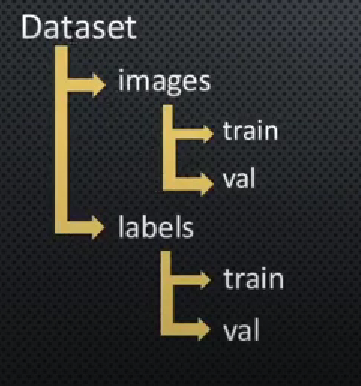




# Move Labels and Images to YOLOV5 Directory Structure

In [17]:
import os
from random import choice
import shutil
def to_v5_directories(images_train_path,images_val_path,labels_train_path,labels_val_path, dataset_source):
    imgs =[]
    xmls =[]
    trainPath = images_train_path
    valPath =  images_val_path
    crsPath = dataset_source
    train_ratio = 0.8
    val_ratio = 0.2
    totalImgCount = len(os.listdir(crsPath))/2
    for (dirname, dirs, files) in os.walk(crsPath):
        for filename in files:
            if filename.endswith('.txt'):
                xmls.append(filename)
            else:
                imgs.append(filename)
    countForTrain = int(len(imgs)*train_ratio)
    countForVal = int(len(imgs)*val_ratio)
    trainimagePath = images_train_path
    trainlabelPath = labels_train_path
    valimagePath = images_val_path
    vallabelPath = labels_val_path
    for x in range(countForTrain):
        fileJpg = choice(imgs)
        fileXml = fileJpg[:-4] +'.txt'
        shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
        shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
        imgs.remove(fileJpg)
        xmls.remove(fileXml)
    for x in range(countForVal):
        fileJpg = choice(imgs) 
        fileXml = fileJpg[:-4] +'.txt' 
        shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
        shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
        imgs.remove(fileJpg)
        xmls.remove(fileXml)
    print("Training images are : ",countForTrain)
    print("Validation images are : ",countForVal)
#     shutil.move(crsPath, valPath)

In [16]:
os.chdir("/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project")
os.getcwd()

'/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project'

In [18]:
to_v5_directories("dataset/images/train","dataset/images/val","dataset/labels/train","dataset/labels/val", "Annotations/Missing_hole")

Training images are :  92
Validation images are :  23


In [19]:
to_v5_directories("dataset/images/train","dataset/images/val","dataset/labels/train","dataset/labels/val", "Annotations/Mouse_bite")

Training images are :  92
Validation images are :  23


In [20]:
to_v5_directories("dataset/images/train","dataset/images/val","dataset/labels/train","dataset/labels/val", "Annotations/Open_circuit")

Training images are :  92
Validation images are :  23


In [21]:
to_v5_directories("dataset/images/train","dataset/images/val","dataset/labels/train","dataset/labels/val", "Annotations/Short")

Training images are :  92
Validation images are :  23


In [22]:
to_v5_directories("dataset/images/train","dataset/images/val","dataset/labels/train","dataset/labels/val", "Annotations/Spur")

Training images are :  92
Validation images are :  23


In [23]:
to_v5_directories("dataset/images/train","dataset/images/val","dataset/labels/train","dataset/labels/val", "Annotations/Spurious_copper")

Training images are :  92
Validation images are :  23


In [ ]:
#Alternative one step solution is this:
#to_v5_directories("/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/dataset/images/train","/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/dataset/images/val","/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/dataset/labels/train","/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/dataset/labels/val", "Annotations/Spurious_copper")

### Checking our current directory

In [6]:
import os
os.getcwd()     

'/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project'

### Move to the required directory where we have the data

In [ ]:
os.chdir("/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project")
os.getcwd()

In [5]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 15368, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15368 (delta 1), reused 6 (delta 0), pack-reused 15355
Receiving objects: 100% (15368/15368), 14.36 MiB | 8.87 MiB/s, done.
Resolving deltas: 100% (10504/10504), done.


In [7]:
%cd yolov5

/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/yolov5


In [8]:
!pip install -r "requirements.txt"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 9.5 MB/s eta 0:00:00


In [13]:
!python train.py --img 416 --batch 16 --epochs 350 --data dataset.yaml --weights yolov5s.pt --cache --name pcb_project

2023-04-08 08:46:41.688998: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-08 08:46:43.179144: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=350, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=pcb_project, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, 

In [14]:
!python val.py --weights runs/train/pcb_project/weights/best.pt --data dataset.yaml 

val: data=dataset.yaml, weights=['runs/train/pcb_project/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
git: '8/INT404-ARTIFICIAL' is not a git command. See 'git --help'.
YOLOv5 🚀 2023-4-8 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/dataset/labels/val.cache... 138 images, 0 backgrounds, 0 corrupt: 100% 138/138 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:23<00:00,  4.61s/it]
                   all        138        598      0.593       0.62      0.609      0.241
          mi

In [15]:
!python detect.py --source ../test/01.JPG  --weights runs/train/pcb_project/weights/best.pt

detect: weights=['runs/train/pcb_project/weights/best.pt'], source=../test/01.JPG, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
git: '8/INT404-ARTIFICIAL' is not a git command. See 'git --help'.
YOLOv5 🚀 2023-4-8 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/test/01.JPG: 352x640 (no detections), 45.2ms
Speed: 0.5ms pre-process, 45.2ms inference, 0.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


## **Displaying some of the important results of our Defect Delection Modle**

In [19]:
from skimage import io

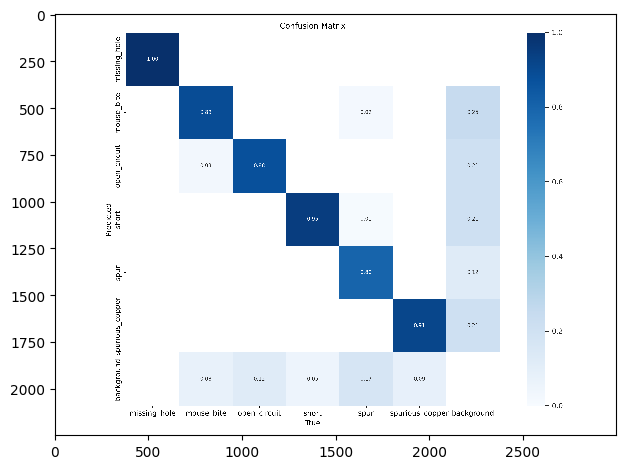

In [20]:
img = io.imread("/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/yolov5/runs/train/pcb_project2/confusion_matrix.png")
io.imshow(img)

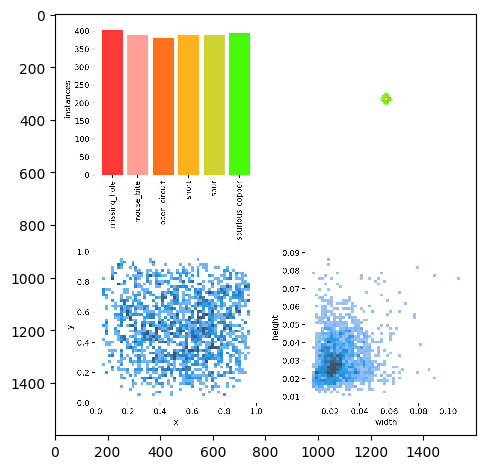

In [18]:
img = io.imread("/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/yolov5/runs/train/pcb_project2/labels.jpg")
io.imshow(img)

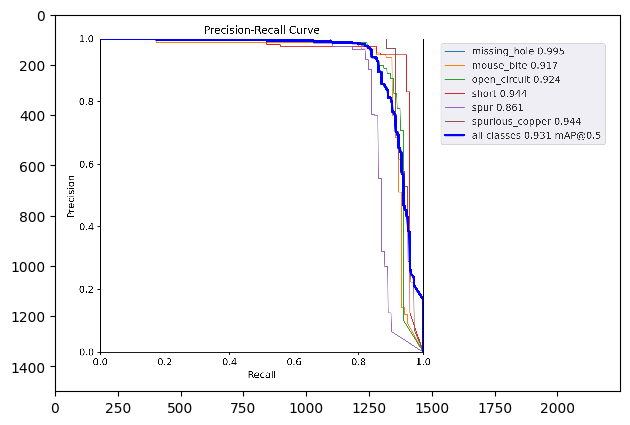

In [21]:
img = io.imread("/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/yolov5/runs/train/pcb_project2/PR_curve.png")
io.imshow(img)

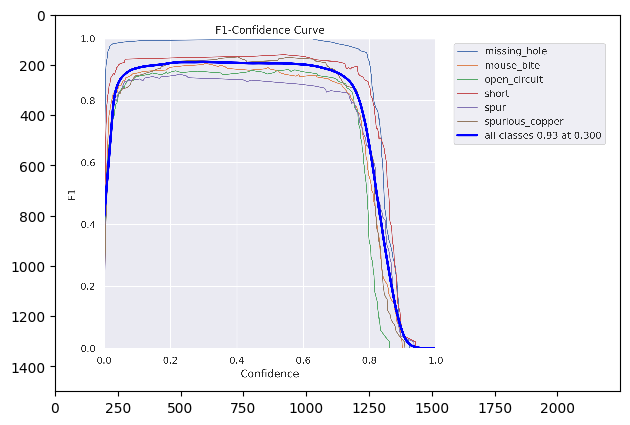

In [22]:
img = io.imread("/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/yolov5/runs/train/pcb_project2/F1_curve.png")
io.imshow(img)

### Actual Image

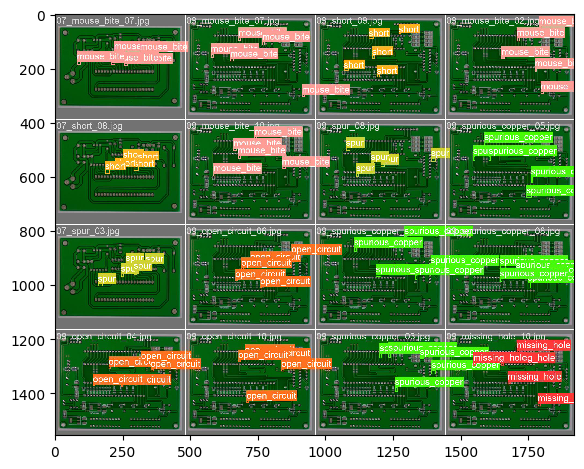

In [28]:
img = io.imread("/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/yolov5/runs/val/exp2/val_batch1_labels.jpg")
io.imshow(img)

### Predicted Results

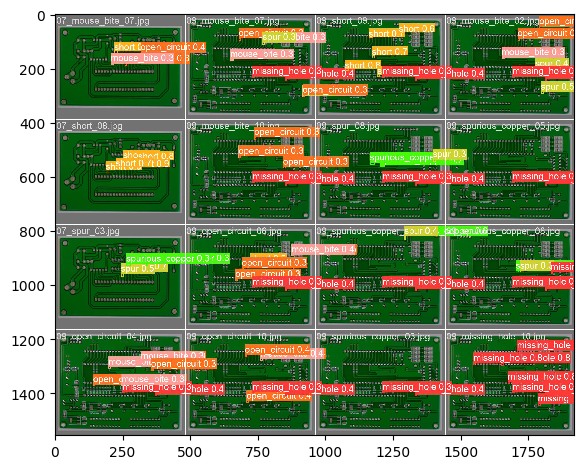

In [25]:
img = io.imread("/content/drive/MyDrive/Sem 8/INT404-ARTIFICIAL INTELLIGENCE/Project/yolov5/runs/val/exp2/val_batch1_pred.jpg")
io.imshow(img)